# Exploratory Data Analysis: The Titanic Dataset

## 1. Introduction

### 1.1. A bit of Histroy

The Titanic's sinking remains one of the most notorious maritime disasters in history.

During its maiden voyage on April 15, 1912, the RMS Titanic, once deemed "unsinkable," tragically met its fate after striking an iceberg. Tragically, the vessel lacked sufficient lifeboats, resulting in 1502 fatalities among the 2224 passengers and crew.

Survival was not entirely dictated by chance; rather, certain groups seemed to have a higher survival rate than others.

### 1.2. Dataset

This Jupyter notebook performs an in-depth **Exploratory Data Analysis (EDA)** on the popular [Titanic dataset](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv). The dataset contains demographic and travelling information from 891 of the 2224 passengers and crew on board of the Titanic. The dataset has 15 columns describing aspects like passengers' gender (sex), age, passenger-class (pclass), fare, and if they survived the tragedy or not.

The columns of the [Titanic dataset](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv) are as follows:

1. __Survived__: This is a binary flag (0 = No, 1 = Yes) indicating whether the passenger survived the shipwreck.
2. __Pclass__: This categorical feature (1 = Upper, 2 = Middle, 3 = Lower) represents the socio-economic class of the passenger.
3. __Sex__: This indicates the gender of the passenger (male or female).
4. __Age__: This is a numerical column that shows the age of the passenger in years.
5. __SibSp__: This numerical column denotes the total number of siblings and spouses the passenger had on board.
6. __Parch__: This numerical column indicates the total number of parents and children the passenger had on board.
7. __Fare__: This numerical column represents the fare that the passenger paid for the trip.
8. __Embarked__: This categorical column (C = Cherbourg, Q = Queenstown, S = Southampton) signifies the port where the passenger embarked on the Titanic.
9. __Class__: This is a string representation of the passenger's class (First, Second, Third).
10. __Who__: This column is a string representation of who the passenger was (man, woman, child).
11. __Adult_male__: This is a Boolean flag indicating whether the passenger was an adult male.
12. __Deck__: This categorical column indicates the deck where the passenger's cabin was located.
13. __Embark_town__: This column is a string representation of the town where the passenger embarked.
14. __Alive__: This column is a string representation of whether the passenger survived (yes, no).
15. __Alone__: This is a Boolean flag indicating whether the passenger was alone on the ship.

### 1.3. Objective

The main goal of this notebook is to delve into this dataset and extract meaningful insights, which can help understand factors that contributed to the survival (or non-survival) of the passengers. We'll tackle missing data, create visualisations, analyse feature distributions, and much more.

### 1.4. Duration

$\approx$ 45minutes

## 2. Packages

In this notebook, we will be using several Python libraries to help with our data analysis. Here's a quick rundown of the libraries and their purpose:

1. **Pandas**: A popular library for data manipulation and analysis. We'll use it for various tasks such as loading the dataset into a DataFrame, handling missing data, and extracting useful information.
2. **NumPy**: A library that adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
3. **Matplotlib**: A plotting library for creating static, animated, and interactive visualisations in Python. We'll be using this library for plotting graphs and charts to visualize our data better.
4. **Seaborn**: A statistical data visualization library based on `Matplotlib`. It provides a high-level interface for creating attractive graphics. We'll be using `Seaborn` for more complex visualizations and to make our `Matplotlib` plots look more attractive.
5. **SciPy**: A library used for scientific and technical computing. It contains modules for optimization, linear algebra, integration, interpolation, special functions, signal and image processing, and more. We'll be using it for conducting statistical tests to analyse our data further.

These libraries form the backbone of our data analysis and allow us to interact with, manipulate, and visualise our data effectively.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## 3. Dataset

## 3.1. Load Dataset

In [2]:
# Load the dataset
# 1. From Seaborn library (recommended)
titanic = sns.load_dataset('titanic')
# 2. From csv file (credit: https://www.kaggle.com/datasets/yasserh/titanic-dataset)
# titanic = pd.read_csv(filepath_or_buffer="./datasets/titanic-dataset.csv")

# Display the first few 10 rows of the dataset
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## 3.2. Missing Values

The `pandas.DataFrame.info()` function is a valuable tool in initial data analysis. It provides a concise summary of a DataFrame. This method prints information about the DataFrame including the index dtype and columns, non-null values and memory usage. It's a quick and easy way to get a snapshot of your data, especially helpful in understanding the type of data you're dealing with, the data types of each column, and spotting if there are any missing values that might need to be handled. This is often the first step in exploring a new dataset as it offers a broad overview of its structure.

In [3]:
# Checking the data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Checking the missing values (NaN)
dic_cols = {}
for col in list(titanic.columns):
    dic_cols[col] = titanic[col].isna().sum()
    print(f"Total missing values for column '{col}' is: {dic_cols[col]}")

Total missing values for column 'survived' is: 0
Total missing values for column 'pclass' is: 0
Total missing values for column 'sex' is: 0
Total missing values for column 'age' is: 177
Total missing values for column 'sibsp' is: 0
Total missing values for column 'parch' is: 0
Total missing values for column 'fare' is: 0
Total missing values for column 'embarked' is: 2
Total missing values for column 'class' is: 0
Total missing values for column 'who' is: 0
Total missing values for column 'adult_male' is: 0
Total missing values for column 'deck' is: 688
Total missing values for column 'embark_town' is: 2
Total missing values for column 'alive' is: 0
Total missing values for column 'alone' is: 0


It looks like the **deck** column (a categorical column that indicates the deck where the passenger's cabin was located) has the highest number of mising values followed by **age** (a numerical column that shows the age of the passenger in years). 

In [5]:
# Rank columns with highest number of missing values
sorted_dic_cols = sorted(dic_cols.items(), key=lambda x:x[1], reverse=True)
sorted_dic_cols

[('deck', 688),
 ('age', 177),
 ('embarked', 2),
 ('embark_town', 2),
 ('survived', 0),
 ('pclass', 0),
 ('sex', 0),
 ('sibsp', 0),
 ('parch', 0),
 ('fare', 0),
 ('class', 0),
 ('who', 0),
 ('adult_male', 0),
 ('alive', 0),
 ('alone', 0)]

To handle missing data, you can either drop these rows or fill them with meaningful values such as mean, median or mode).

In [6]:
# For example, we can fill missing age values with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Or with the mode which is the number that occurs most often in a dataset
# titanic['age'].fillna(titanic['age'].mode(), inplace=True)

In [7]:
# Dropping 'deck' column due to excessive missing values
titanic.drop('deck', axis=1, inplace=True)

In [8]:
# Dropping rows with missing 'embarked' values
titanic.dropna(subset=['embarked'], inplace=True)

Let's check if we still have any missing values.

In [9]:
for col in list(titanic.columns):
    print(f"Total missing values for column '{col}' is: {titanic[col].isna().sum()}")

Total missing values for column 'survived' is: 0
Total missing values for column 'pclass' is: 0
Total missing values for column 'sex' is: 0
Total missing values for column 'age' is: 0
Total missing values for column 'sibsp' is: 0
Total missing values for column 'parch' is: 0
Total missing values for column 'fare' is: 0
Total missing values for column 'embarked' is: 0
Total missing values for column 'class' is: 0
Total missing values for column 'who' is: 0
Total missing values for column 'adult_male' is: 0
Total missing values for column 'embark_town' is: 0
Total missing values for column 'alive' is: 0
Total missing values for column 'alone' is: 0


It looks like our dataset is ready for the next step!

## 4. Exploratory Analysis

The `pandas.DataFrame.describe()` method is a powerful tool that generates descriptive statistics of a `DataFrame`. For numerical columns, it provides a summary of central tendency, dispersion and shape of the dataset's distribution, excluding `NaN` values. It calculates statistics such as __count__, __mean__, __standard deviation__, __minimum__ value, __25th percentile__ (Q1), __median__ (50th percentile or Q2), __75th percentile__ (Q3), and the __maximum__ value. For object-type (including string) columns, it gives a simple summary of the number of __unique__ values, the most __frequent__ value, and the __count__ of the most frequent value. This method is extremely useful for a quick statistical analysis of the dataset and helps to understand the distribution of the data.

In [10]:
# Descriptive statistics for numerical columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Descriptive statistics for categorical columns
titanic.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,889,889,889,889,889
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


## 5. Data Visualisation

Now, let's create some visualisations. 

### 5.1. Cross-Tabulation

First, we'll look at the distribution of survivors based on different features. The `pandas.crosstab()` function is a useful tool for creating a cross-tabulation of two (or more) factors. It provides a simple way to summarise categorical data and compute a simple cross-tabulation of two or more data arrays. The result is a `DataFrame` that provides a multidimensional frequency table, where the factors are grouped according to their corresponding categories. This function is often used for frequency distribution in contingency tables and is particularly beneficial for summarising and visualising the relationship between two categorical variables in a dataset.

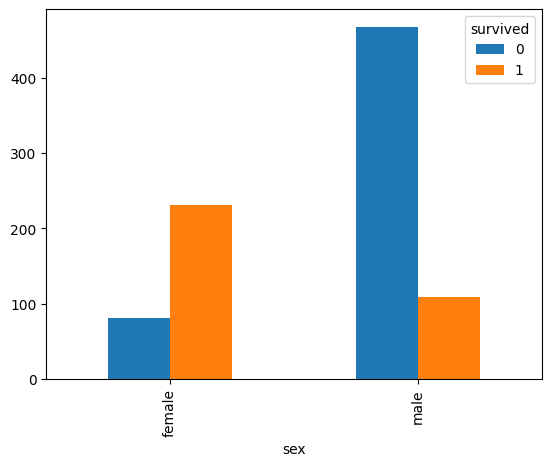

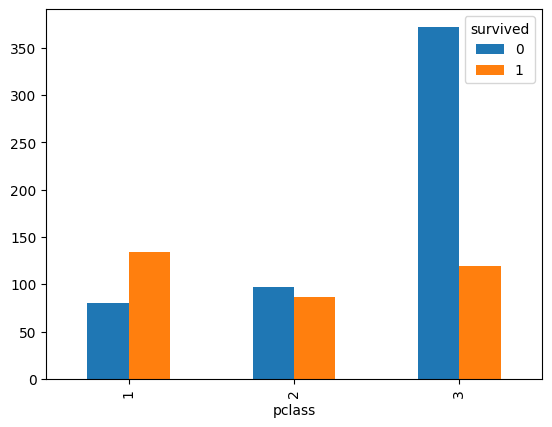

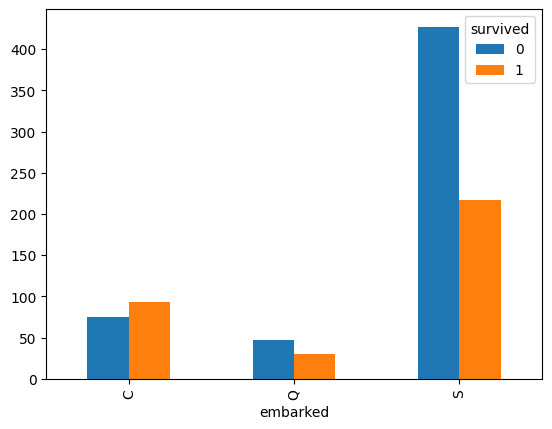

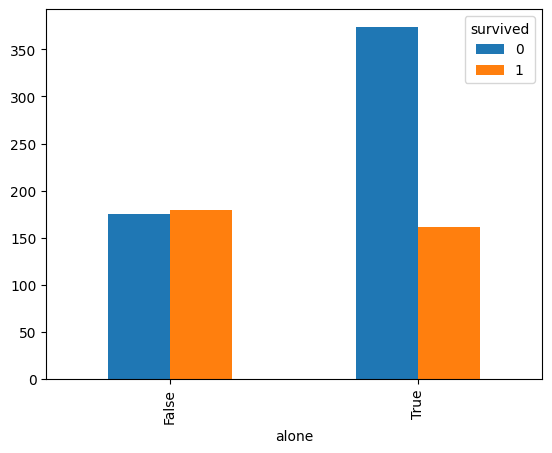

In [12]:
# Bar plots for categorical features
for col in ['sex', 'pclass', 'embarked', 'alone']:
    pd.crosstab(titanic[col], titanic['survived']).plot(kind='bar')

It looks like:
    
   1. There were more **female** survivors, and a lot of **male** passengers couldn't survive the shipwreck.
   2. Almost **half** of the passengers embarked on the Titanic from **Southampton** couldn't survive.
   3. Passengers who **weren't alone** on the ship had more chances to survive.

### 5.2. Distribution

We can also examine the age distribution of survivors and non-survivors.

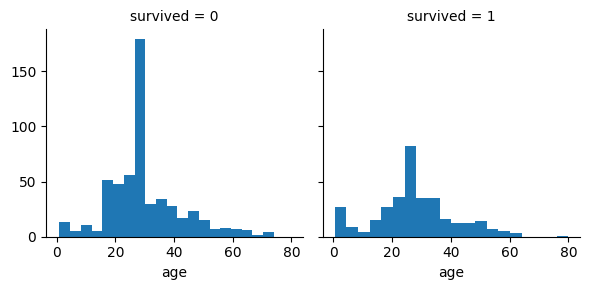

In [13]:
# Age distribution of survivors vs non-survivors
g = sns.FacetGrid(titanic, col='survived')
g.map(plt.hist, 'age', bins=20)

This graph contains two sub-plots, one for each survival outcome (survived = 0/1). Each sub-plot is a histogram that shows the frequency distribution of passenger ages in that particular survival category.

1. **Non-Survivors (Survived = 0)**: The left subplot displays the age distribution of passengers who did not survive the disaster. This histogram allows us to identify age groups with higher frequencies among the non-survivors.
2. **Survivors (Survived = 1)**: The right subplot, on the other hand, represents the age distribution of survivors. Just like the non-survivors plot, it enables us to visualise which age groups were more likely to survive.

By comparing these two plots, you can start to discern patterns or trends relating to survival and age. For example, if one age group has a significantly higher frequency in the 'Survivors' plot than the 'Non-Survivors' plot, it might indicate that this age group had a higher survival rate. It's important to note, however, that while these plots can suggest correlations, they do not establish causation, and further statistical testing might be necessary for a comprehensive analysis.

### 5.3. Box plot

Let's now create a box plot for the `age` and `fare` variables:

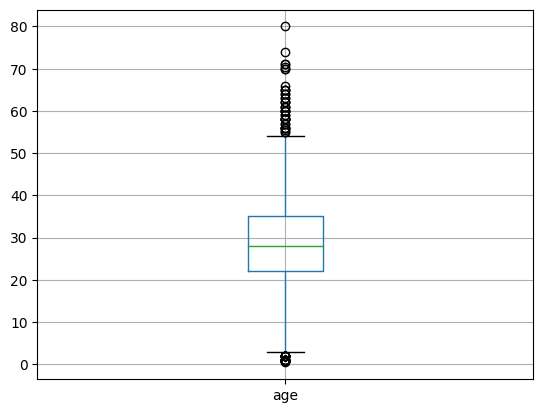

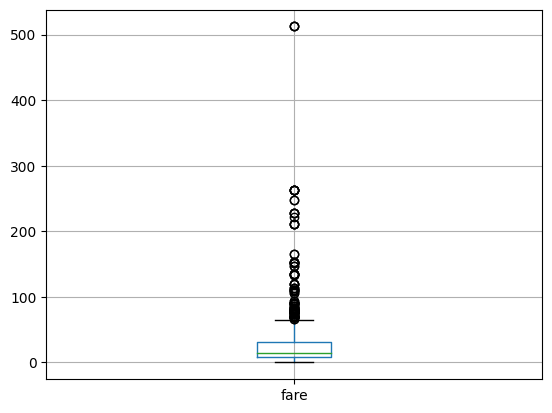

In [14]:
# Box plots for 'age' and 'fare'
for col in ['age', 'fare']:
    titanic.boxplot(column=col)
    plt.show()

These box plots depict the distributions of the 'age' and 'fare' variables in the Titanic dataset. Here's a possible interpretation:

<img src="./images/box-plots-flip-card-1.png" alt="Alternative text" />
<center>Image credit: <a href="https://thirdspacelearning.com/gcse-maths/statistics/box-plot/">thirdspacelearning.com</a></center>

1. __Age__: The box plot for `age` summarises the distribution of passenger ages. The box represents the interquartile range (IQR: 25th percentile (Q1) to 75th percentile (Q3)), the line inside the box is the median (50th percentile), and the whiskers typically represent the range of values within 1.5 times the IQR from Q1 and Q3. Points beyond the whiskers are considered outliers and could indicate unusually young or old passengers. By examining this plot, we can understand the central tendency, spread, and skewness of the `age` variable, as well as identify potential outliers.
2. __Fare__: The box plot for `fare` encapsulates the distribution of fares paid by passengers. Similar to the `age` plot, the box represents the IQR, the line inside is the median, and the whiskers extend to values within 1.5 times the IQR. Points beyond the whiskers are considered outliers. In this case, outliers could represent passengers who paid exceptionally high fares. This plot can help us understand the spread and skewness of the `fare` variable, and identify unusually high or low fares.

These box plots provide an overview of the data's distribution and can be especially helpful for identifying skewness and potential outliers. The `age` plot might inform us about the demographics of the passengers, while the `fare` plot might give insights into the socio-economic status of the passengers.

### 5.4. Correlation Matrix

We can also study the correlations between different features:

<Axes: >

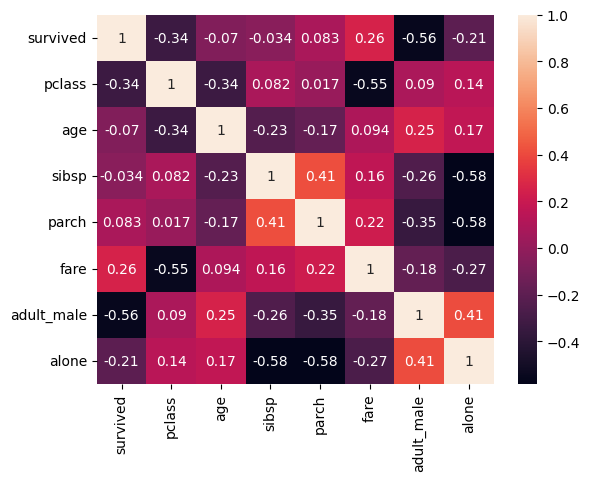

In [15]:
# Correlation matrix heatmap
corr_matrix = titanic.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

The code above generates a correlation matrix heatmap of the Titanic dataset, a very insightful representation of the relationship between different numerical features. The heatmap quantifies the linear relationships between the numerical variables. The correlation coefficient ranges from -1 to 1:
1. A correlation coefficient close to 1 indicates a strong positive linear relationship. This means that when one variable increases, the other tends to increase as well.
2. A coefficient close to -1 indicates a strong negative linear relationship. This means that when one variable increases, the other tends to decrease.
3. A coefficient close to 0 suggests there's no linear relationship, i.e., changes in one variable do not correspond with changes in the other.

In the heatmap, each square shows the correlation coefficient between the variables represented by the corresponding row and column. The color of the squares reflects the correlation coefficient's magnitude, with a legend provided for reference.

The `annot=True` argument in the `sns.heatmap()` function ensures that the correlation coefficients are displayed on the squares. 

This heatmap provides a high-level overview of the relationships between variables, helping identify pairs of variables that are highly correlated. For example, `pclass` and `dare` have a strong negative correlation, it might suggest that passengers in higher classes (denoted by lower `pclass` values) tend to pay higher fares. Understanding these relationships can be invaluable for later stages of a data science pipeline, such as feature selection in machine learning.

### 5.5. Chi-Square test

Finally, we can perform a Chi-Square test to understand the association between categorical variables:

In [16]:
# Frequency distribution of `survived` and `sex`
contingency_table = pd.crosstab(titanic['survived'], titanic['sex'])
contingency_table

sex,female,male
survived,,
0,81,468
1,231,109


In [17]:
# Chi-Square test of independence between 'survived' and 'sex'
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"The p-value for this test is: {p} (<0.05)")

The p-value for this test is: 3.7799096665576e-58 (<0.05)


The Chi-Square test of independence is used to determine if there is a significant association between two categorical variables. In this case, it's being used to test if there is an association between the `survived` and `sex` variables.

First, a contingency table is created using `pd.crosstab()`, which contains the frequency distribution of `survived` and `sex`. Each cell in the table represents the frequency of a unique combination of 'survived' and 'sex'. Then, `chi2_contingency()` is applied to the contingency table, which performs the Chi-Square test of independence. This function returns:
1. `chi2`: The test statistic.
2. `p`: The p-value of the test.
3. `dof`: Degrees of freedom.
4. `expected`: The expected frequencies, based on the marginal sums of the table.

The p-value (`p`) is of particular interest. It indicates the probability of observing a chi-square statistic as extreme as the one calculated (or more extreme) under the null hypothesis (which states that the variables are independent, i.e., there's no association between them).

If `p` is small (typically, less than `0.05`), we reject the null hypothesis and conclude that there is a significant association between `survived` and `sex`. If `p` is large (greater than or equal to `0.05`), we fail to reject the null hypothesis, suggesting that `survived` and `sex` are independent.

In other words, this test could help us understand if the survival rate on the Titanic was independent of a passenger's gender or if gender significantly influenced survival chances.

## 6. Conclusion

This notebook is just a starting point. You can further explore relationships between other variables, conduct more advanced statistical analyses, and perhaps even build a basic predictive model.